In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv(
    './dataset/Sunspots.csv', 
    index_col='Date', 
    parse_dates=['Date'], 
    usecols=['Date', 'Monthly Mean Total Sunspot Number']
)
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [39]:
from sklearn.model_selection import train_test_split

train_size = int(len(df) * .66)
df_train, df_test = df[:train_size].values, df[train_size:].values

print(f'Observation: {df.shape[0]}')
print(f'Train: {df_train.shape[0]}')
print(f'Test: {df_test.shape[0]}')

Observation: 3235
Train: 2135
Test: 1100


C:\Users\Angga\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


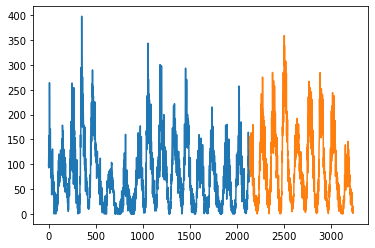

In [40]:
plt.plot(df_train)
plt.plot([None for i in df_train] + [x for x in df_test])
plt.show()

In [43]:
test = [None for i in df_train] + [x for x in df_test]

array([1.6])

Observations: 1619
Training Observations: 811
Testing Observations: 808
Observations: 2427
Training Observations: 1619
Testing Observations: 808
Observations: 3235
Training Observations: 2427
Testing Observations: 808


C:\Users\Angga\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\Angga\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\Angga\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

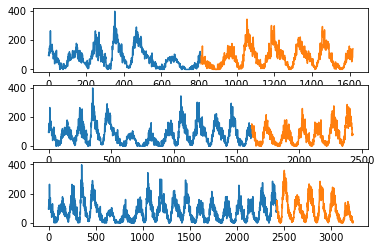

In [48]:
from sklearn.model_selection import TimeSeriesSplit

X = df.values
splits = TimeSeriesSplit(n_splits=3)
plt.figure(1)
index = 1

for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(3,1,index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1
plt.show()

## Walk Forward Validation
In practice, we very likely will retrain our model as new data becomes available. This would
give the model the best opportunity to make good forecasts at each time step. We can evaluate
our machine learning models under this assumption. There are few decisions to make:

1. Minimum Number of Observations. First, we must select the minimum number of observations required to train the model. This may be thought of as the window width if a sliding window is used (see next point).
2. Sliding or Expanding Window. Next, we need to decide whether the model will be trained on all data it has available or only on the most recent observations. This determines whether a sliding or expanding window will be used.

Because this methodology involves moving along the time series one-time step at a time, it is
often called Walk Forward Testing or Walk Forward Validation.

In [59]:
X = df.values.flatten()
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print(f'train={len(train)}, test={len(test)}')

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

train=2880, test=1
train=2881, test=1
train=2882, test=1
train=2883, test=1
train=2884, test=1
train=2885, test=1
train=2886, test=1
train=2887, test=1
train=2888, test=1
train=2889, test=1
train=2890, test=1
train=2891, test=1
train=2892, test=1
train=2893, test=1
train=2894, test=1
train=2895, test=1
train=2896, test=1
train=2897, test=1
train=2898, test=1
train=2899, test=1
train=2900, test=1
train=2901, test=1
train=2902, test=1
train=2903, test=1
train=2904, test=1
train=2905, test=1
train=2906, test=1
train=2907, test=1
train=2908, test=1
train=2909, test=1
train=2910, test=1
train=2911, test=1
train=2912, test=1
train=2913, test=1
train=2914, test=1
train=2915, test=1
train=2916, test=1
train=2917, test=1
train=2918, test=1
train=2919, test=1
train=2920, test=1
train=2921, test=1
train=2922, test=1
train=2923, test=1
train=2924, test=1
train=2925, test=1
train=2926, test=1
train=2927, test=1
train=2928, test=1
train=2929, test=1
train=2930, test=1
train=2931, test=1
train=2932, 